# LeNet

![title](lenet.png)

## 加载数据

In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

mnist = input_data.read_data_sets("./MNIST_data", one_hot=True)

X_train, Y_train = mnist.train.images, mnist.train.labels
X_validation, Y_validation = mnist.validation.images, mnist.validation.labels
X_test, Y_test = mnist.test.images, mnist.test.labels

print("Image size: {}".format(X_train[0].shape))
print("Training set: {}".format(X_train.shape))
print("Validation set: {}".format(X_validation.shape))
print("Testing set: {}".format(X_test.shape))

/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


Extracting ./MNIST_data/train-images-idx3-ubyte.gz
Extracting ./MNIST_data/train-labels-idx1-ubyte.gz
Extracting ./MNIST_data/t10k-images-idx3-ubyte.gz
Extracting ./MNIST_data/t10k-labels-idx1-ubyte.gz
Image size: (784,)
Training set: (55000, 784)
Validation set: (5000, 784)
Testing set: (10000, 784)


## 可视化数据

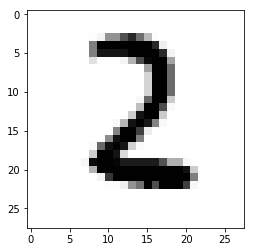

In [2]:
import random
import matplotlib.pyplot as plt
tf.set_random_seed(2018)

index = random.randint(0, mnist.train.num_examples)
plt.imshow(mnist.train.images[index].reshape(28, 28), cmap="Greys", interpolation="nearest")
plt.show()

### 各层参数详解

### 输入层

In [1]:
import tensorflow as tf

X = tf.placeholder(tf.float32, shape=[None, 784])
X_img = tf.reshape(X, shape=[-1, 28, 28, 1])
Y = tf.placeholder(tf.float32, shape=[None, 10])

/Users/apple/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [3]:
X_img = tf.pad(X_img, [[0, 0], [2, 2], [2, 2], [2, 2]])
X_img.get_shape()

TensorShape([Dimension(None), Dimension(32), Dimension(32), Dimension(5)])

### 第一层：卷积层

In [4]:
conv1_W = tf.Variable(tf.truncated_normal(shape=[5, 5, 1, 6], mean=0.0, stddev=0.1))
conv1_b = tf.Variable(tf.zeros([6]))
conv1 = tf.nn.conv2d(X_img, filter=conv1_W, strides=[1, 1, 1, 1], padding="SAME")
conv1 = tf.nn.bias_add(conv1, conv1_b)
conv1 = tf.nn.relu(conv1)
print(conv1.shape)

(?, 28, 28, 6)


### 第二层：池化层

In [5]:
pool_1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
print(pool_1.shape)

(?, 14, 14, 6)


### 第三层：卷积层

In [6]:
conv2_W = tf.Variable(tf.truncated_normal(shape=[5, 5, 6, 16], mean=0.0, stddev=0.1))
conv2_b = tf.Variable(tf.zeros([16]))
conv2 = tf.nn.conv2d(pool_1, filter=conv2_W, strides=[1, 1, 1, 1], padding="VALID")
conv2 = tf.nn.bias_add(conv2, conv2_b)
conv2 = tf.nn.relu(conv2)
print(conv2.shape)

(?, 10, 10, 16)


### 第四层：池化层

In [7]:
pool_2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding="VALID")
print(pool_2.shape)

(?, 5, 5, 16)


### 第五层：全连接层

In [8]:
fc1 = tf.reshape(pool_2, shape=[-1, 5*5*16])
fc1_W = tf.Variable(tf.truncated_normal(shape=[5*5*16, 120], mean=0.0, stddev=0.1))
fc1_b = tf.Variable(tf.zeros([120]))
fc1 = tf.matmul(fc1, fc1_W) + fc1_b
fc1 = tf.nn.relu(fc1)
print(fc1.shape)

(?, 120)


### 第六层：全连接层

In [9]:
fc2_W = tf.Variable(tf.truncated_normal(shape=[120, 84], mean=0.0, stddev=0.1))
fc2_b = tf.Variable(tf.zeros([84]))
fc2 = tf.matmul(fc1, fc2_W) + fc2_b
fc2 = tf.nn.relu(fc2)
print(fc2.shape)

(?, 84)


### 第七层：全连接层

In [10]:
fc3_W = tf.Variable(tf.truncated_normal(shape=[84, 10], mean=0.0, stddev=0.1))
fc3_b = tf.Variable(tf.zeros([10]))
logits = tf.matmul(fc2, fc3_W) + fc3_b
print(logits.shape)

(?, 10)


In [11]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y))
optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(cost)

is_correction = tf.equal(tf.argmax(logits, 1), tf.argmax(Y, 1))
accuracy = tf.reduce_mean(tf.cast(is_correction, tf.float32))

saver = tf.train.Saver()

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.



### 模型评估

### 训练模型

In [12]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    print("Learning Started...")
    for epoch in range(2):
        avg_acc = 0
        avg_cost = 0
        total_batch = int(mnist.train.num_examples / 128)
        
        for i in range(total_batch):
            batch_x, batch_y = mnist.train.next_batch(128)
            feed_dict = {X: batch_x, Y: batch_y}
            _, a, c = sess.run([optimizer, accuracy, cost], feed_dict=feed_dict)
            avg_acc += a / total_batch
            avg_cost += c / total_batch
            
        print("Epoch: {}\tLoss: {:.9f}\tAccuracy: {:.2%}".format(epoch+1, avg_cost, avg_acc))
    print("Training finished!")
    
    saver.save(sess, "ckpt_notebooks/LeNet/lenet.ckpt")
    print("Model saved!")

Learning Started...
Epoch: 1	Loss: 0.350215774	Accuracy: 90.13%
Epoch: 2	Loss: 0.088521203	Accuracy: 97.30%
Training finished!
Model saved!


## 评估模型

In [15]:
with tf.Session() as sess:
    model_file = tf.train.latest_checkpoint("ckpt_notebooks/LeNet")
    saver.restore(sess, model_file)
    test_accuracy = sess.run(accuracy, feed_dict={X: X_test, Y: Y_test})
    print("Accuracy on test set:{:.3%}".format(test_accuracy))

INFO:tensorflow:Restoring parameters from ckpt_notebooks/LeNet/lenet.ckpt
Accuracy on test set:97.860%
